In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dataset = pd.read_excel("Book1.xlsx")
dataset.head(7)

,Description,Invoice,Col,Item,Qty,Unit Price,Discount,Total
0,Invoice 3-456-1 Data 1,3-456-1,444,NaN,1,1,12.0,-11.0
1,Invoice 3-456-1 Data 2,3-456-1,342,323.0,2,2,23.0,-19.0
2,Invoice 3-456-1 Data 3,3-456-1,345,23.0,3,3,3.0,6.0
3,Invoice 3-456-1 Data 4,3-456-1,456,NaN,4,4,4.0,12.0
4,Invoice 3-456-1 Data 5,3-456-1,556,454.0,5,5,5.0,20.0
5,Invoice 3-456-1 Data 6,3-456-1,556,554.0,6,6,6.0,30.0
6,Invoice 3-456-1 Data 7,3-456-1,658.466667,566.0,7,7,7.0,42.0


In [20]:
dataset.isnull().sum()

Description     0
Invoice         0
Col             0
Item            3
Qty             0
Unit Price      0
Discount       12
Total           1
dtype: int64

C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\1100036523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item"])


<function matplotlib.pyplot.show(close=None, block=None)>

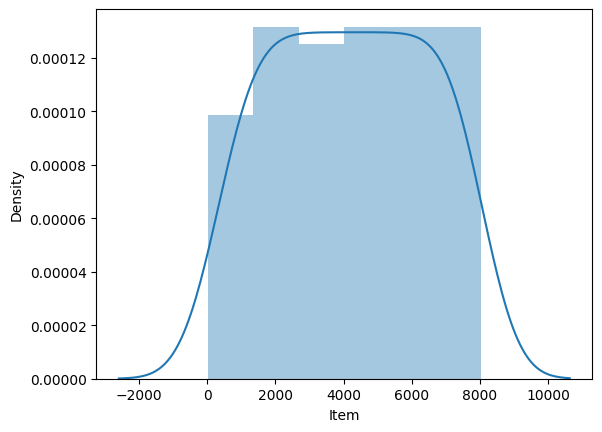

In [21]:
sns.distplot(dataset["Item"])
plt.show

In [22]:
q1= dataset["Item"].quantile(0.25)
q2= dataset["Item"].quantile(0.75)
iqr= q2-q1

In [23]:
min_r = q1-(1.5*iqr)
max_r = q2+(1.5*iqr)
min_r,max_r

(-3454.4107142857147, 11840.946428571426)

In [24]:
dataset[dataset["Item"]<=max_r]

,Description,Invoice,Col,Item,Qty,Unit Price,Discount,Total
1,Invoice 3-456-1 Data 2,3-456-1,342,323.000000,2,2,23.00000,-19.00000
2,Invoice 3-456-1 Data 3,3-456-1,345,23.000000,3,3,3.00000,6.00000
4,Invoice 3-456-1 Data 5,3-456-1,556,454.000000,5,5,5.00000,20.00000
5,Invoice 3-456-1 Data 6,3-456-1,556,554.000000,6,6,6.00000,30.00000
6,Invoice 3-456-1 Data 7,3-456-1,658.466667,566.000000,7,7,7.00000,42.00000
...,...,...,...,...,...,...,...,...
112,Invoice 3-456-1 Data 25,3-456-1,688457.255238,7746.392857,50,25,25.00000,1225.00000
113,Invoice 3-456-2 Data 1,3-456-2,696865.146667,7814.071429,51,5,NaN,255.00000
114,Invoice 3-456-2 Data 2,3-456-2,705273.038095,7881.750000,52,4,5.00000,203.00000
115,Invoice 3-456-2 Data 3,3-456-2,713680.929524,7949.428571,53,6,7.00000,311.00000


In [25]:
# dataset = dataset[dataset["Item"]<=max_r]

C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\1100036523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item"])


<function matplotlib.pyplot.show(close=None, block=None)>

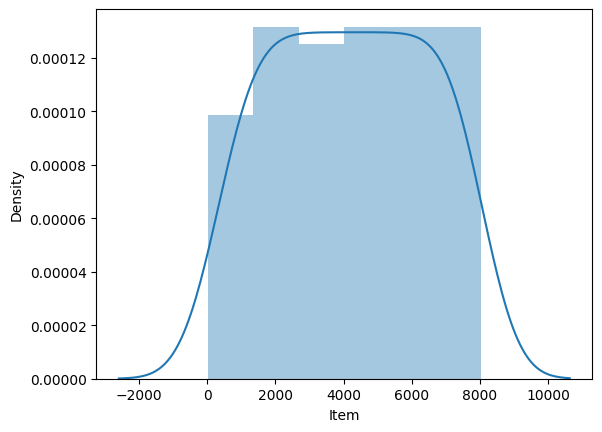

In [26]:
sns.distplot(dataset["Item"])
plt.show

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [28]:
ft = FunctionTransformer(func=np.log1p)

In [29]:
ft.fit(dataset[["Item"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [30]:
ft.transform(dataset[["Item"]])

,Item
0,NaN
1,5.780744
2,3.178054
3,NaN
4,6.120297
...,...
112,8.955112
113,8.963809
114,8.972432
115,8.980981


In [31]:
dataset["Item tf"]=ft.transform(dataset[["Item"]])

C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\1933925239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item"])
C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\1933925239.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item tf"])


<function matplotlib.pyplot.show(close=None, block=None)>

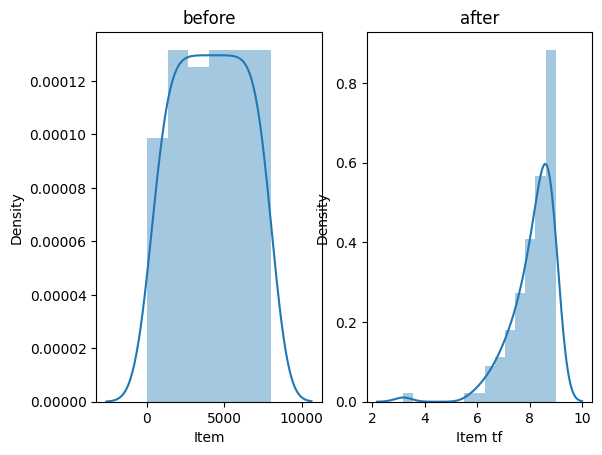

In [32]:
plt.subplot(1,2,1)
sns.distplot(dataset["Item"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(dataset["Item tf"])
plt.title("after")

plt.show

In [35]:
ft1 = FunctionTransformer(func= lambda x : x**2)
ft1.fit(dataset[["Item"]])
dataset["Item tf1"]= ft1.transform(dataset[["Item"]])

C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\3998086495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item"])
C:\Users\MUHIB\AppData\Local\Temp\ipykernel_800\3998086495.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Item tf1"])


<function matplotlib.pyplot.show(close=None, block=None)>

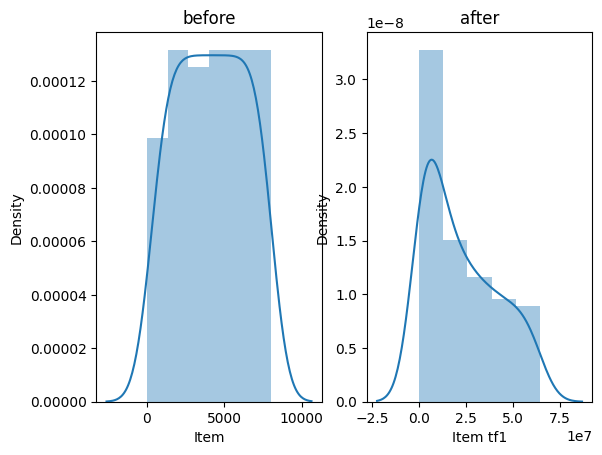

In [36]:
plt.subplot(1,2,1)
sns.distplot(dataset["Item"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(dataset["Item tf1"])
plt.title("after")

plt.show